In [1]:
from modules.client import OffVarianceClient
import modules.utils as utils
from dotenv import dotenv_values

config = dotenv_values('../.env')

client = OffVarianceClient(config.get('OFF_VARIANCE_KEY'), data_path='../data')
games_df = client.get_finished_games()

games_df = utils.filter_correct_games(games_df)
utils.populate_metrics(games_df)

In [2]:
segmented_df = games_df.loc[
(games_df['team1_home_classic_minutes'] >= 90 * 3) & (games_df['team2_away_classic_minutes'] >= 90 * 3) &
(games_df['odds_open_win2'] >= 1.8) & (games_df['odds_open_win2'] <= 2.7) &
(games_df['odds_open_tb25'] >= 1.6) & (games_df['odds_open_tb25'] <= 2)
]

Count: 213
Open profit: -6.457000000000004
Close profit: -7.190000000000001
Open ROI: -0.030314553990610348
Close ROI: -0.03375586854460094
UDI: 0.004069604492205101
AxesSubplot(0.125,0.125;0.775x0.755)


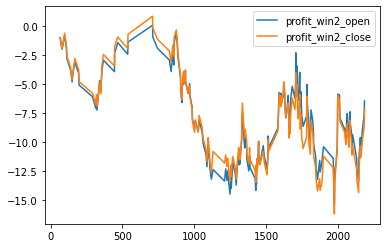

In [3]:
utils.print_away_win_result(segmented_df)

In [4]:
utils.analyze_correlation(segmented_df, 'difference', utils.metrics)

,correlation
expected_total_loc,-0.145346
simple_expected_total_value_loc,-0.124488
expected_total,-0.117664
expected_difference_loc,0.084685
expected_difference,0.075304
simple_expected_total_value,-0.074375
simple_expected_difference_loc,0.036402
simple_expected_difference,0.022993


In [5]:
utils.analyze_avg_udi(segmented_df, utils.metrics, 'udi_win2')

,low,high,diff
expected_difference_loc,-0.297263,-0.638241,0.340978
expected_difference,-0.241853,-0.563157,0.321304
simple_expected_difference_loc,-0.082843,-0.250408,0.167565
expected_total_loc,2.699978,2.863298,0.163320
simple_expected_difference,-0.322255,-0.483469,0.161214
expected_total,2.597678,2.741529,0.143850
simple_expected_total_value_loc,5.411471,5.495918,0.084448
simple_expected_total_value,5.412745,5.496122,0.083377


In [6]:
updated_segmented_df = segmented_df.loc[
(segmented_df['expected_difference_loc'] <= -0.56) & (segmented_df['expected_difference'] <= -0.50)
]

utils.analyze_avg_udi(updated_segmented_df, [
    'expected_difference_loc',
    'expected_difference',
], 'udi_win2')

,low,high,diff
expected_difference,-0.941510,-0.952236,0.010727
expected_difference_loc,-1.231195,-1.230809,0.000386


Count: 15
Open profit: 3.6899999999999995
Close profit: 2.950000000000001
Open ROI: 0.24599999999999997
Close ROI: 0.19666666666666674
UDI: 0.05422087827113515
AxesSubplot(0.125,0.125;0.775x0.755)


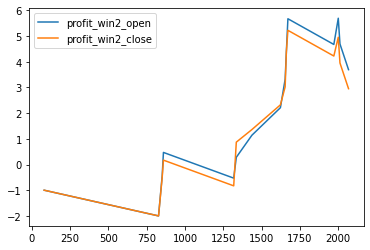

In [7]:
filtered_result_df = segmented_df.loc[
(segmented_df['expected_difference_loc'] <= -1.17) & (segmented_df['expected_difference'] <= -0.92)
]
utils.print_away_win_result(filtered_result_df)